In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.morphology import binary_opening, binary_closing, disk
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

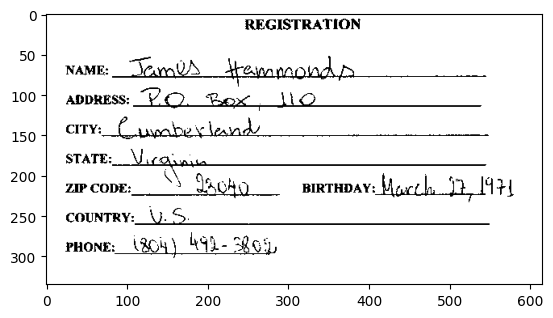

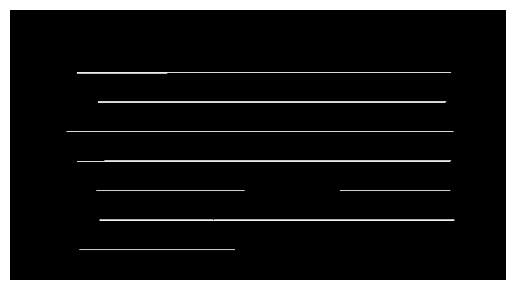

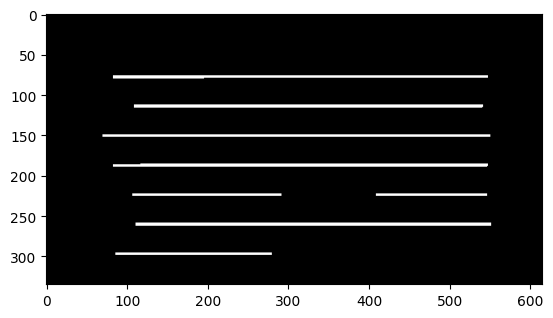

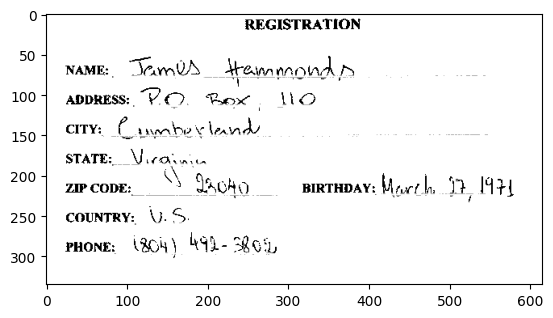

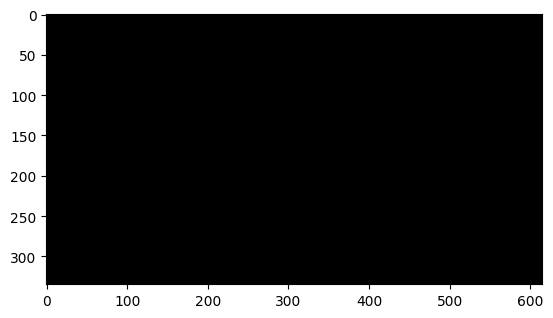

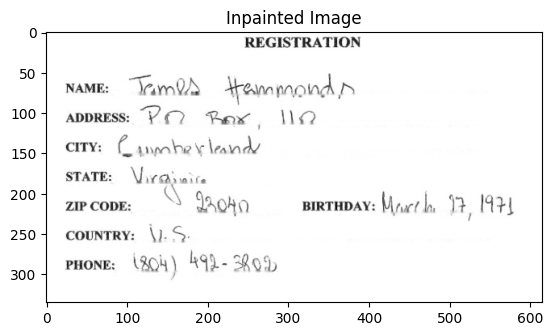

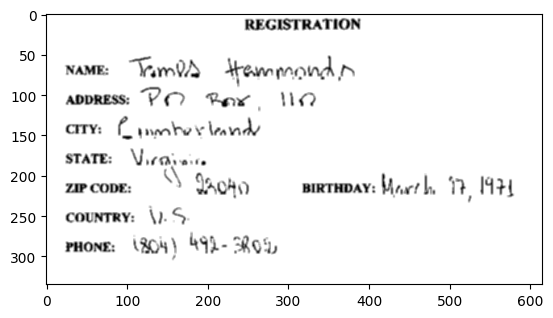

In [38]:
image= cv2.imread('document.jpg',0)
# use gaussian filter to smooth the image
binary= cv2.GaussianBlur(image,(3,3),10)
thresh = threshold_otsu(image)
binary = image > thresh

# convert binary image to uint8 with 255 as white and 0 as black
binary = binary.astype(np.uint8)*255

# show the image
plt.imshow(binary, cmap='gray')
plt.show()

# invert the image
binary_inv = cv2.bitwise_not(binary)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
detected_lines = cv2.morphologyEx(binary_inv, cv2.MORPH_OPEN,
horizontal_kernel, iterations=1)
plt.imshow(detected_lines, cmap='gray')
plt.axis('off')
plt.show()

# dialate the detected lines
detected_lines = cv2.dilate(detected_lines, np.ones((3,2)), iterations=1)

# show the image
plt.imshow(detected_lines, cmap='gray')
plt.show()



# set intensity to 255 for all pixels detected as lines where the above three pixels are white
# for i in range(binary.shape[0]):
#     for j in range(binary.shape[1]):
#         if detected_lines[i,j] == 255:
#             sum=0
#             for k in range(3):
#                 sum+=binary[i-k,j]
#             sum=sum/3
#             if sum>200:
#                 binary[i,j]=255
#             else:
#                 binary[i,j]=0

detected_lines= cv2.GaussianBlur(detected_lines,(3,3),10)
detected_lines_inv = cv2.bitwise_not(detected_lines)

binary= cv2.bitwise_or(binary,detected_lines)

# show the image
plt.imshow(binary, cmap='gray')
plt.show()


# use closing to remove small holes
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# show the image
plt.imshow(closing, cmap='gray')
plt.show()
# use erosion to remove horizontal lines
# kernel = np.ones((25,3),np.uint8)
# erosion = cv2.erode(binary,kernel,iterations = 1)

# show the image
# plt.imshow(erosion, cmap='gray')
# plt.show()

newimg= cv2.inpaint(image,detected_lines,2,cv2.INPAINT_TELEA)
plt.imshow(newimg, cmap='gray',)
plt.title('Inpainted Image')
plt.show()

# use thresholding to get binary image
thresh = threshold_otsu(newimg)
binary = newimg > thresh


# convert binary image to uint8 with 255 as white and 0 as black
binary = binary.astype(np.uint8)*255

binary_inv= cv2.bitwise_not(binary)


binary= cv2.GaussianBlur(binary,(3,3),100)

# show the image
plt.imshow(binary, cmap='gray')
plt.show()



In [3]:
img = cv2.imread(r'document.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove horizontal lines
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
print(thresh)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))

# Using morph close to get lines outside the drawing
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=3)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
mask = np.zeros(gray.shape, np.uint8)
for c in cnts:
    cv2.drawContours(mask, [c], -1, (255,255,255),2)

# First inpaint
img_dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

gray_dst = cv2.cvtColor(img_dst, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_dst, 50, 150, apertureSize = 3)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))

# Using morph open to get lines inside the drawing
opening = cv2.morphologyEx(edges, cv2.MORPH_OPEN, horizontal_kernel)
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
mask = np.uint8(img_dst)
mask = np.zeros(gray_dst.shape, np.uint8)
for c in cnts:
    cv2.drawContours(mask, [c], -1, (255,255,255),2)

# Second inpaint
img2_dst = cv2.inpaint(img_dst, mask, 3, cv2.INPAINT_TELEA)

cv2.imshow('img2_dst', img2_dst)
cv2.waitKey()
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


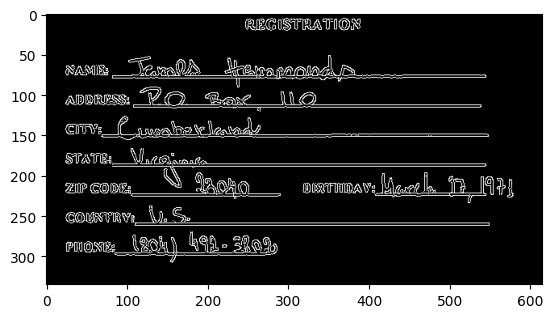

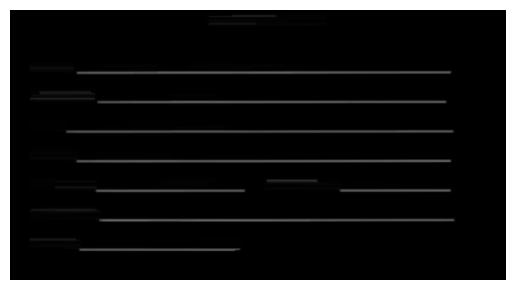

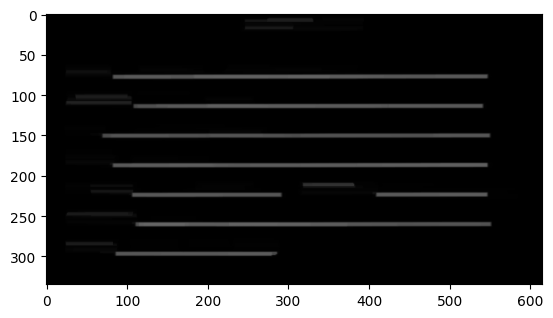

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\photo\src\inpaint.cpp:767: error: (-210:Unsupported format or combination of formats) The mask must be 8-bit 1-channel image in function 'icvInpaint'


In [7]:
# Read image
image = cv2.imread('document.jpg')
image=cv2.GaussianBlur(image,(3,3),10)
mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
 
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)

# show the edges
plt.imshow(edges, cmap='gray')
plt.show()

binary_inv = cv2.bitwise_not(image)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
detected_lines = cv2.morphologyEx(binary_inv, cv2.MORPH_OPEN,
horizontal_kernel, iterations=1)
plt.imshow(detected_lines, cmap='gray')
plt.axis('off')
plt.show()

# dialate the detected lines
detected_lines = cv2.dilate(detected_lines, np.ones((3,2)), iterations=1)

# show the image
plt.imshow(detected_lines, cmap='gray')
plt.show()



# Dilating
# img_dilation = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=1)

 
# # Apply HoughLinesP method to
# # to directly obtain line end points
# lines = cv2.HoughLinesP(
#             img_dilation, # Input edge image
#             1, # Distance resolution in pixels
#             np.pi/180, # Angle resolution in radians
#             threshold=100, # Min number of votes for valid line
#             minLineLength=5, # Min allowed length of line
#             maxLineGap=10 # Max allowed gap between line for joining them
#             )

# lines_list = []

# for points in lines:
#     x1,y1,x2,y2=points[0]
#     lines_list.append([(x1,y1),(x2,y2)])
#     slope = ((y2-y1) / (x2-x1)) if (x2-x1) != 0 else np.inf
    
#     if slope <= 1:
#         cv2.line(mask,(x1,y1),(x2,y2), color=(255, 255, 255),thickness = 2)
    
result = cv2.inpaint(image,detected_lines,3,cv2.INPAINT_TELEA)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.show()

# Display the image
plt.imshow(result)
plt.show()



In [29]:
import cv2
import numpy as np

def show(imgs, win="Image", scale=1):
    imgs = [cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) \
            if len(img.shape) == 2 \
            else img for img in imgs]
    img_concat = np.concatenate(imgs, 1)
    h, w = img_concat.shape[:2]
    cv2.imshow(win, cv2.resize(img_concat, (int(w * scale), int(h * scale))))

d = {"Hue Min": (0, 179),
     "Hue Max": (116, 179),
     "Sat Min": (0, 255),
     "Sat Max": (30, 255),
     "Val Min": (160, 255),
     "Val Max": (253, 255),
     "k1": (31, 50),
     "k2": (31, 50),
     "sigma": (10, 20)}

img = cv2.imread(r"input.jpg")
cv2.namedWindow("Track Bars")
for i in d:
    cv2.createTrackbar(i, "Track Bars", *d[i], id)

img = cv2.imread("document.jpg")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
while True:
    h_min, h_max, s_min, s_max, v_min, v_max, k1, k2, s = (cv2.getTrackbarPos(i, "Track Bars") for i in d)
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(img_hsv, lower, upper)
    mask = cv2.erode(mask, np.ones((3, 3)))
    k1, k2 = k1 // 2 * 2 + 1, k2 // 2 * 2 + 1
    img_blurred = cv2.GaussianBlur(img, (k1, k2), s)
    result = img_blurred.copy()
    result[mask == 0] = img[mask == 0]
    show([img, mask], "Window 1", 0.5) # Show original image & mask
    show([img_blurred, result], "Window 2", 0.5) # Show blurred image & result
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Track Bars' in function 'cvGetTrackbarPos'


: 